In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import confusion_matrix, classification_report, log_loss, hinge_loss, make_scorer
from sklearn.model_selection import GridSearchCV
from pandas.plotting import table

In [4]:
data = pd.read_csv('Machine learning.csv')
data.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,2.146,2.528,10.766,26.84,10.06,0.7015,6.5122,2.49,2.67,0.0160,Burrow,96,5
1,4.246,2.526,21.267,53.86,20.52,0.7446,3.4995,2.53,2.62,0.0156,Burrow,4,1
2,2.394,2.524,11.972,30.28,11.52,0.4557,3.8041,2.53,2.63,0.0350,Burrow,100,6
3,2.384,2.538,12.055,30.57,11.12,0.9343,7.7463,2.54,2.75,0.0246,Burrow,96,5
4,4.142,2.536,20.911,52.22,19.28,1.6342,7.8109,2.50,2.71,0.0241,Matrix,0,0


# DATA PROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sample Length       76 non-null     float64
 1   Sample Diameter     76 non-null     float64
 2   Sample Volume       76 non-null     float64
 3   Dry Weight          76 non-null     float64
 4   Particle Volume     76 non-null     float64
 5   Pore Volume         76 non-null     float64
 6   Porosity            76 non-null     float64
 7   Particle Density    76 non-null     float64
 8   Volumetric Density  76 non-null     float64
 9   Permeability        76 non-null     float64
 10  Location            76 non-null     object 
 11  BI Vol.             76 non-null     int64  
 12  Bioturbation Index  76 non-null     int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 7.8+ KB


In [6]:
data.describe()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,BI Vol.,Bioturbation Index
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.670474,2.456237,12.706955,30.601053,11.270075,1.439730,11.905903,2.545579,2.601763,0.543403,52.328947,2.934211
std,1.009254,0.067536,5.083903,12.662752,4.818277,0.940347,6.871460,0.253269,0.191158,1.388744,41.781779,2.093390
min,0.946000,2.345000,4.472100,11.190000,3.927600,0.120100,1.784700,2.310000,2.002300,0.007100,0.000000,0.000000
25%,1.954500,2.382000,9.704250,23.385000,8.790750,0.962350,7.584800,2.380000,2.511050,0.035600,4.000000,1.000000
50%,2.415500,2.461500,11.666000,28.005000,10.270000,1.316400,11.015000,2.475000,2.685000,0.152500,60.000000,3.000000
75%,3.394250,2.526000,14.977500,34.065000,12.557500,1.627300,12.477500,2.542500,2.710000,0.316750,94.500000,5.000000
max,4.996000,2.552000,25.399000,63.170000,23.640000,5.375300,28.398000,3.307400,3.080000,7.009700,100.000000,6.000000


# Scaling and Encoding

In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
norm = MinMaxScaler()
encode = LabelEncoder()

In [8]:
data['Location'] = encode.fit_transform(data['Location'])
data.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,2.146,2.528,10.766,26.84,10.06,0.7015,6.5122,2.49,2.67,0.0160,1,96,5
1,4.246,2.526,21.267,53.86,20.52,0.7446,3.4995,2.53,2.62,0.0156,1,4,1
2,2.394,2.524,11.972,30.28,11.52,0.4557,3.8041,2.53,2.63,0.0350,0,100,6
3,2.384,2.538,12.055,30.57,11.12,0.9343,7.7463,2.54,2.75,0.0246,0,96,5
4,4.142,2.536,20.911,52.22,19.28,1.6342,7.8109,2.50,2.71,0.0241,2,0,0


In [9]:
Data_x = data.iloc[:,:-1]
Data_x
col = list(Data_x.keys())
Data_tf = pd.DataFrame(data=norm.fit_transform(Data_x), columns=col)
Data_tf['Bioturbation Index'] = data.iloc[:,-1]
Data_tf.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,0.296296,0.884058,0.300756,0.301077,0.311094,0.110633,0.177637,0.180469,0.619560,0.001271,0.5,0.96,5
1,0.814815,0.874396,0.802551,0.820893,0.841724,0.118835,0.064434,0.220573,0.573165,0.001214,0.5,0.04,1
2,0.357531,0.864734,0.358386,0.367257,0.385159,0.063861,0.075879,0.220573,0.582444,0.003984,0.0,1.00,6
3,0.355062,0.932367,0.362352,0.372836,0.364867,0.154932,0.224008,0.230600,0.693792,0.002499,0.0,0.96,5
4,0.789136,0.922705,0.785539,0.789342,0.778819,0.288115,0.226436,0.190495,0.656676,0.002428,1.0,0.00,0


# Feature selection using SelectKBest

In [10]:
fe_selection = SelectKBest(score_func=f_classif, k=8).fit_transform(Data_tf.iloc[:,:-1],Data_tf.iloc[:,-1])
fe_selection.shape
feat_select = pd.DataFrame(fe_selection)
feat_select.head(5)

,0,1,2,3,4,5,6,7
0,0.296296,0.300756,0.301077,0.311094,0.619560,0.001271,0.5,0.96
1,0.814815,0.802551,0.820893,0.841724,0.573165,0.001214,0.5,0.04
2,0.357531,0.358386,0.367257,0.385159,0.582444,0.003984,0.0,1.00
3,0.355062,0.362352,0.372836,0.364867,0.693792,0.002499,0.0,0.96
4,0.789136,0.785539,0.789342,0.778819,0.656676,0.002428,1.0,0.00


In [11]:
feat_select = SelectKBest(score_func=f_classif, k=5).fit(data.iloc[:,:-1],data.iloc[:,-1])
param = pd.DataFrame()
param['features'] = data.iloc[:,:-1].columns
param['f_score'] = feat_select.scores_
param['P_values'] = feat_select.pvalues_
param['Features_bool'] = feat_select.get_support()
param= param.sort_values(by='f_score', ascending=False)
param = param.round(5)
param

,features,f_score,P_values,Features_bool
11,BI Vol.,1241.36351,0.00000,True
10,Location,297.57530,0.00000,True
3,Dry Weight,0.94045,0.47201,True
4,Particle Volume,0.93460,0.47602,True
0,Sample Length,0.91738,0.48791,True
2,Sample Volume,0.90445,0.49695,False
8,Volumetric Density,0.49503,0.80994,False
9,Permeability,0.44303,0.84746,False
7,Particle Density,0.33727,0.91489,False
5,Pore Volume,0.20085,0.97543,False


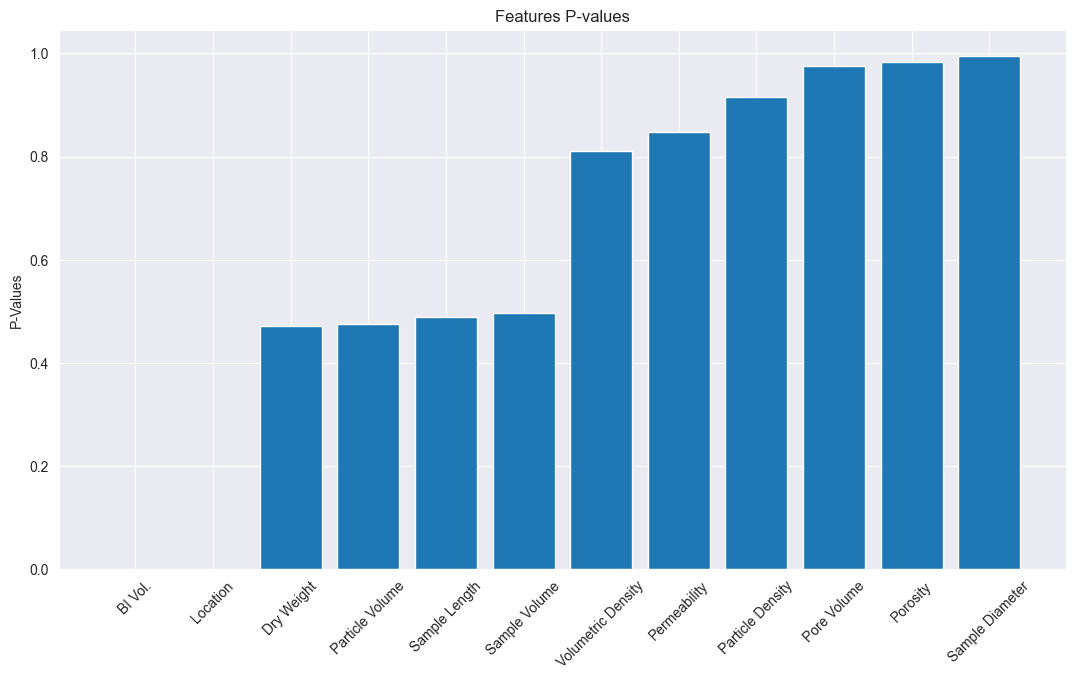

In [12]:
plt.figure(figsize=(13,7))
plt.bar(param['features'], param['P_values'])
plt.ylabel('P-Values')
plt.xticks(rotation = 45)
plt.title('Features P-values')
plt.savefig('P-Values')

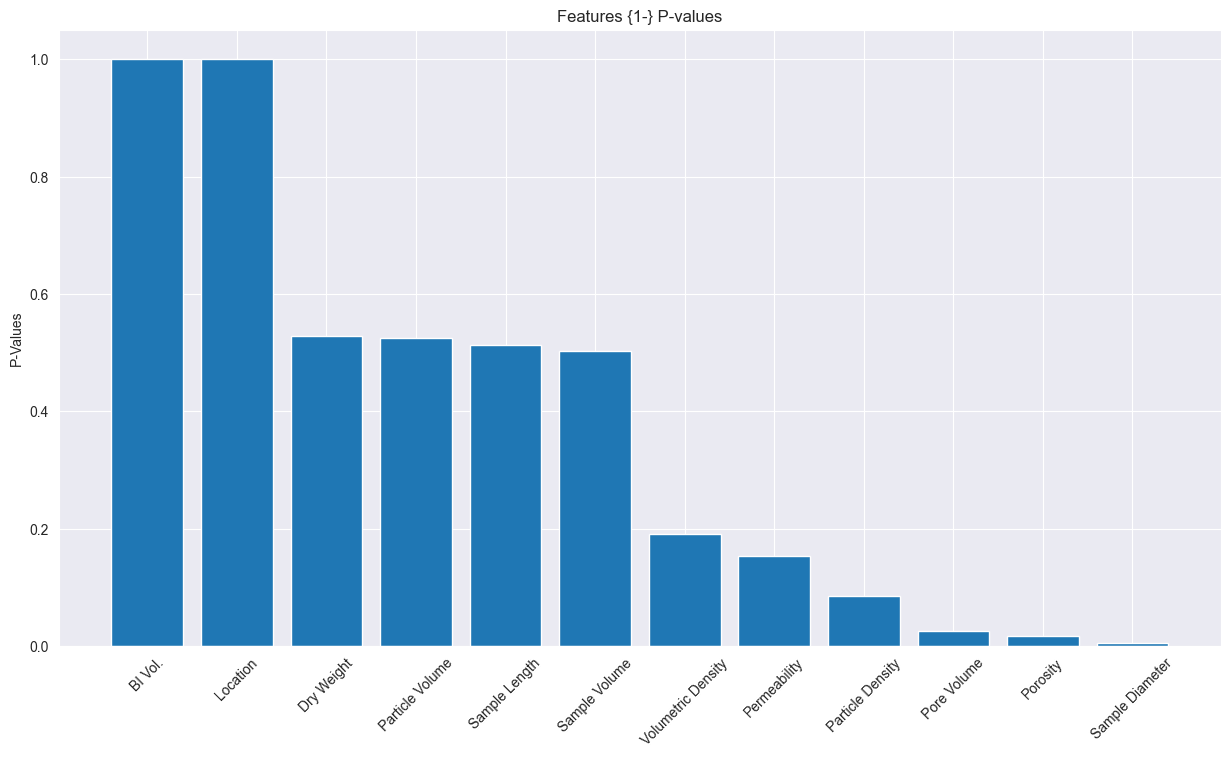

In [13]:
plt.figure(figsize=(15,8))
plt.bar(param['features'],1 - param['P_values'])
plt.xticks(rotation = 45)
plt.ylabel('P-Values')
plt.title('Features {1-} P-values')
plt.savefig('1-(P-Values)')

In [14]:
New_data = Data_tf.drop(['Sample Length','Particle Volume','Dry Weight','Sample Volume','Pore Volume','Bioturbation Index'], axis=1)
New_data['Bioturbation Index'] = Data_tf.iloc[:,-1]
New_data.head()

,Sample Diameter,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,0.884058,0.177637,0.180469,0.619560,0.001271,0.5,0.96,5
1,0.874396,0.064434,0.220573,0.573165,0.001214,0.5,0.04,1
2,0.864734,0.075879,0.220573,0.582444,0.003984,0.0,1.00,6
3,0.932367,0.224008,0.230600,0.693792,0.002499,0.0,0.96,5
4,0.922705,0.226436,0.190495,0.656676,0.002428,1.0,0.00,0


<Axes: >

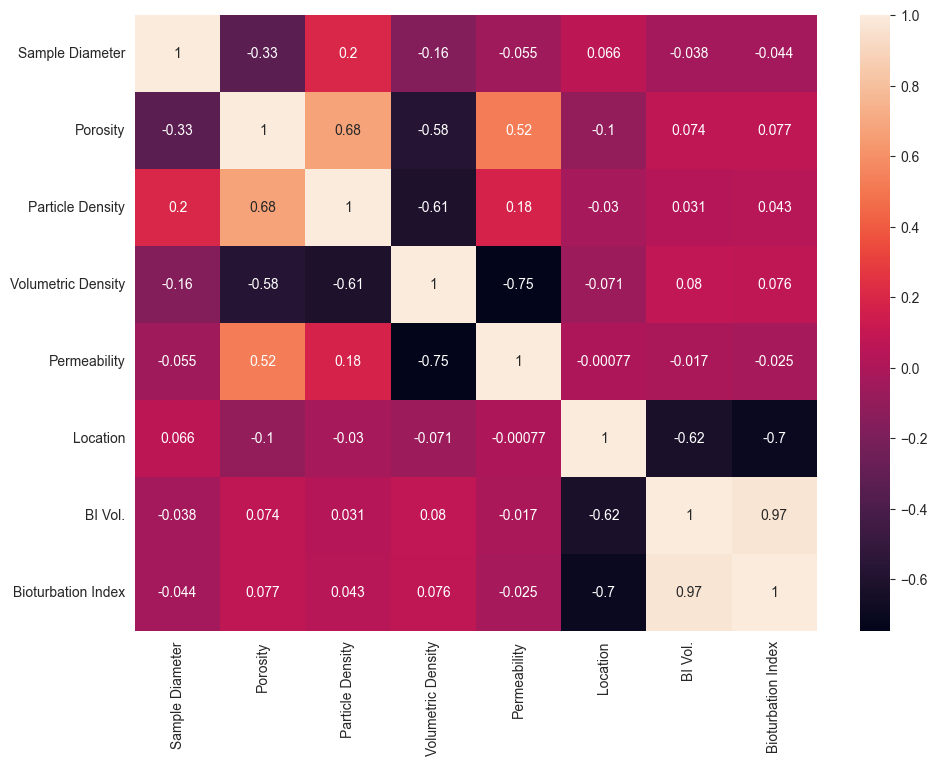

In [15]:
corr = New_data.corr()
plt.figure(figsize= (11,8))
sns.heatmap(corr, annot=True, cbar=True)

In [16]:
#sns.pairplot(New_data,hue='Bioturbation Index', palette= ['red', 'green','blue','violet','purple'])

# Data splitting, Cross_validation and Retraining

In [17]:
X = New_data.iloc[:,:-1]
y = New_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
print('X_train shape = ', X_train.shape )
print('X_test shape = ', X_test.shape )
print('y_train shape = ', y_train.shape )
print('y_test shape = ', y_test.shape )

X_train shape =  (60, 7)
X_test shape =  (16, 7)
y_train shape =  (60,)
y_test shape =  (16,)


In [18]:
Cl_svc = SVC()
Cl_lda = LinearDiscriminantAnalysis()
models = [ Cl_svc, Cl_lda]

In [19]:
splits = StratifiedKFold(n_splits=5, shuffle=True)
SVCcv_scr = cross_validate(Cl_svc, X_train, y_train, cv=splits, return_estimator=True, return_train_score=True)

ldacv_scr = cross_validate(Cl_lda, X_train, y_train, cv=splits, return_estimator=True, return_train_score=True)

In [20]:
scores = pd.DataFrame({'SVC': (1-SVCcv_scr['train_score']),
                       'LDA': (1-ldacv_scr['train_score'])})
scores

,SVC,LDA
0,0.375000,0.083333
1,0.312500,0.020833
2,0.333333,0.062500
3,0.250000,0.125000
4,0.354167,0.062500


In [21]:
print('SVC: ',SVCcv_scr['train_score'].mean())
print('LDA: ',ldacv_scr['train_score'].mean())

SVC:  0.675
LDA:  0.9291666666666666


In [22]:
k_neighbors =  range(3,11,2)
for k in k_neighbors:
    Cl_knn = KNeighborsClassifier(n_neighbors=k)
    knncv_scr = cross_validate(Cl_knn, X_train, y_train, cv=splits, return_estimator=True, return_train_score=True)
    knnscore = pd.DataFrame({k: knncv_scr['train_score']})   
    print(knnscore)

          3
0  0.708333
1  0.750000
2  0.791667
3  0.770833
4  0.833333
          5
0  0.583333
1  0.583333
2  0.708333
3  0.645833
4  0.666667
          7
0  0.541667
1  0.708333
2  0.625000
3  0.604167
4  0.562500
          9
0  0.625000
1  0.562500
2  0.645833
3  0.604167
4  0.645833


In [23]:
CRS_pred = SVCcv_scr['estimator'][0].predict(X_train)
CRS_report = classification_report(y_train,CRS_pred, target_names=["Class 0","Class 1","Class 2","Class 3","Class 4","Class 5","Class 6"])
print(CRS_report)

              precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96        13
     Class 1       0.62      1.00      0.76         8
     Class 2       0.50      0.17      0.25         6
     Class 3       1.00      0.86      0.92         7
     Class 4       0.00      0.00      0.00         8
     Class 5       0.00      0.00      0.00         8
     Class 6       0.38      1.00      0.56        10

    accuracy                           0.62        60
   macro avg       0.50      0.56      0.49        60
weighted avg       0.53      0.62      0.53        60


C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
CRS_pred = SVCcv_scr['estimator'][0].predict(X_train)
CRS_report = confusion_matrix(y_train,CRS_pred)
print(CRS_report)

[[12  0  1  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  5  1  0  0  0  0]
 [ 0  0  0  6  1  0  0]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0 10]]


In [25]:
CRK_pred = knncv_scr['estimator'][0].predict(X_train)
CRK_report = confusion_matrix(y_train,CRK_pred)
print(CRK_report)

[[13  0  0  0  0  0  0]
 [ 1  7  0  0  0  0  0]
 [ 0  4  2  0  0  0  0]
 [ 0  3  0  3  0  1  0]
 [ 0  0  0  0  3  4  1]
 [ 0  0  0  0  3  5  0]
 [ 0  0  0  0  3  6  1]]


In [26]:
CRL_pred = ldacv_scr['estimator'][0].predict(X_train)
CRL_report = confusion_matrix(y_train,CRL_pred)
print(CRL_report)

[[13  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0  1  5  2]
 [ 0  0  0  0  0  2  8]]


# Optimization with Gridsearchcv

In [27]:
gdModel = KNeighborsClassifier()
params = [{ 'n_neighbors':[3,5,7,9],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [5,10,15,10]
          }]
Gdkmodel = GridSearchCV(estimator=gdModel, param_grid=params, scoring='accuracy', return_train_score=True, cv=splits)
Gdkmodel.fit(X_train, y_train)
print(Gdkmodel.best_params_)
print(Gdkmodel.best_score_)

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}
0.6


In [28]:
gdsModel = SVC()
params = [{'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel': ['rbf', 'linear']
          }]
Gdsmodel = GridSearchCV(estimator=gdsModel, param_grid=params, scoring='accuracy', return_train_score=True, cv=splits)
Gdsmodel.fit(X_train, y_train)
print(Gdsmodel.best_params_)
print(Gdsmodel.best_score_)

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
0.7666666666666667


In [29]:
gdlModel =  LinearDiscriminantAnalysis()
grid = dict()
grid['solver'] = ['svd', 'eigen','lsqr']
grid['shrinkage'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,]
Gdlmodel = GridSearchCV(gdlModel, param_grid = grid, scoring='accuracy', return_train_score=True, cv=splits)
Gdlmodel.fit(X_train, y_train)
print('Best Prams:', Gdlmodel.best_params_)
print('Best Score:', Gdlmodel.best_score_)


Best Prams: {'shrinkage': 0.1, 'solver': 'eigen'}
Best Score: 0.7666666666666666


C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\skl

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
for k in range(3,11,2):#'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'uniform'
    cl_knn1 = KNeighborsClassifier(n_neighbors=k,algorithm='auto',leaf_size=5, weights='uniform')
    cl_knn1.fit(X_train,y_train)
    knn_pred = cl_knn1.predict(X_train)
    knn_prob = cl_knn1.predict_proba(X_test)
    print(cl_knn1.score(X_train, y_train))

0.8
0.65
0.65
0.6166666666666667


In [32]:
C= [1,10,100,1000]
for c in C:
    cl_svm = SVC(C=c, gamma=0.01,kernel='rbf')
    cl_svm.fit(X_train,y_train)
    svm_pred = cl_svm.predict(X_train)
    print(cl_svm.score(X_train, y_train))

0.21666666666666667
0.5
0.6833333333333333
0.8666666666666667


# TRAINING AND TESTING OF BEST HYPERPARAMETERS

In [33]:
#Best Prams: {'shrinkage': 0.9, 'solver': 'eigen'}
cl_lda = LinearDiscriminantAnalysis(shrinkage=0.9, solver='eigen')
cl_lda.fit(X_train,y_train)
lda_pred = cl_lda.predict(X_train)
lda_prob = cl_lda.predict_proba(X_test)
print(cl_lda.score(X_train, y_train))
Ldatest_prediction = cl_lda.predict(X_test)

0.7


In [34]:
svm_train = SVC(C=100, kernel='rbf', gamma=1)
svm_train.fit(X_train,y_train)
print(svm_train.score(X_train,y_train))
Svmtest_prediction = svm_train.predict(X_test)

0.9666666666666667


In [35]:
knn_train = KNeighborsClassifier(n_neighbors=3)
knn_train.fit(X_train, y_train)
print(knn_train.score(X_train, y_train))
Knntest_prediction = knn_train.predict(X_test)

0.8


In [36]:
y_test = list(y_test)
outcomes = pd.DataFrame(data=y_test, columns=['Actual value'])
outcomes['KNN_PRED'] = Knntest_prediction
outcomes['LDA_PRED'] = Ldatest_prediction
outcomes['SVM_PRED'] = Svmtest_prediction
outcomes

,Actual value,KNN_PRED,LDA_PRED,SVM_PRED
0,0,0,0,0
1,0,0,0,0
2,4,5,5,4
3,5,5,5,5
4,3,2,2,3
5,1,1,2,1
6,2,1,1,1
7,3,4,4,3
8,3,2,2,3
9,5,5,5,5


In [37]:
# TESTING OF DATASETS
print('KNN Accuracy: ', accuracy_score(y_test, Knntest_prediction))
print('SVM Accuracy: ', accuracy_score(y_test, Svmtest_prediction))
print('LDA Accuracy: ', accuracy_score(y_test, Ldatest_prediction))

KNN Accuracy:  0.5
SVM Accuracy:  0.8125
LDA Accuracy:  0.3125
